VADER GIVES THREE DIFFERENT OUTPUTS , to get the overall we want the compound

"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically designed to detect sentiments expressed in social media."

"Twitter tweets supplemented the LIWC, ANEW, and the General Inquirer lexicons to tune the model’s accuracy. In the original paper, Hutto and Gilbert (2014) use the 8-step methodology to construct and validate the classifier"

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/sentiment_dataset.csv')

Text(0, 0.5, 'frequency')

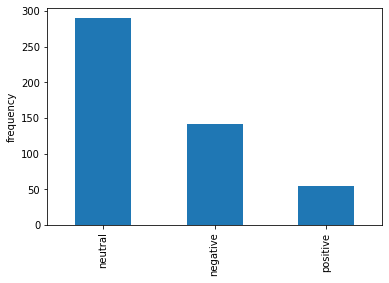

In [8]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.ylabel('frequency')

In [9]:
df['sentiment'].value_counts()

neutral     290
negative    142
positive     55
Name: sentiment, dtype: int64

In [12]:
55/142

0.3873239436619718

In [ ]:
df = df[df['sentiment'] != 'neutral']

In [ ]:
! pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.1 MB/s 


In [ ]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
#
import numpy as np

def show_metrics(y_test, y_predicted):
  print(confusion_matrix(y_test, y_predicted))
  print(classification_report(y_test, y_predicted))
  print(accuracy_score(y_test, y_predicted))


def sentiment_vader(sentence, threshold):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= threshold :
        overall_sentiment = "positive"

    #elif sentiment_dict['compound'] <= - threshold :
    #    overall_sentiment = "negative"

    else :
        overall_sentiment = "negative"
  
    return negative, neutral, positive, compound, overall_sentiment


def analise_vader(df, col_text, col_label):
  from sklearn import preprocessing

  le = preprocessing.LabelEncoder()
  le.fit(df[col_label])
  labels = le.transform(df[col_label])
  scores = []
  prediction_range = []
  for k in np.arange(0, 1, 0.05):
    predicted = []
    for X, y in zip(df[col_text], df[col_label]):
      predicted.append(sentiment_vader(X, k)[-1])
    print("k = {}:".format(k))
    scores.append(f1_score(labels, le.transform(predicted), average="weighted"))
    prediction_range.append(accuracy_score(labels, le.transform(predicted)))


  ix = np.argmax(scores)
  print(np.arange(0, 1, 0.05)[ix])
  predicted = []
  for X, y in zip(df['text'], df['sentiment']):
    predicted.append(sentiment_vader(X, np.arange(0, 1, 0.05)[ix])[-1])
  show_metrics(labels, le.transform(predicted))

  return scores, prediction_range


In [ ]:
scores = analise_vader(df, 'text', 'sentiment')

k = 0.0:
k = 0.05:
k = 0.1:
k = 0.15000000000000002:
k = 0.2:
k = 0.25:
k = 0.30000000000000004:
k = 0.35000000000000003:
k = 0.4:
k = 0.45:
k = 0.5:
k = 0.55:
k = 0.6000000000000001:
k = 0.65:
k = 0.7000000000000001:
k = 0.75:
k = 0.8:
k = 0.8500000000000001:
k = 0.9:
k = 0.9500000000000001:
0.30000000000000004
[[103  39]
 [ 10  45]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       142
           1       0.54      0.82      0.65        55

    accuracy                           0.75       197
   macro avg       0.72      0.77      0.73       197
weighted avg       0.81      0.75      0.76       197

0.751269035532995


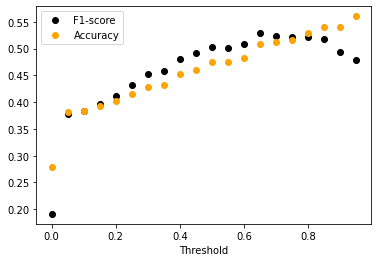

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 1, 0.05), scores[0], 'o', color='black', label="F1-score")
plt.plot(np.arange(0, 1, 0.05), scores[1], 'o', color='orange', label="Accuracy")
plt.xlabel('Threshold')
plt.legend(numpoints=1)
